<a href="https://colab.research.google.com/github/kunjkinger/machine-learning-projects/blob/time_series_analysis/AR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from statsmodels.tsa.ar_model import AR,ARResults

In [ ]:
df = pd.read_csv('uspopulation.csv',index_col=0,parse_dates=True)

In [ ]:
df.index.freq = 'MS'

In [ ]:
df.head()

,PopEst
DATE,
2011-01-01,311037
2011-02-01,311189
2011-03-01,311351
2011-04-01,311522
2011-05-01,311699


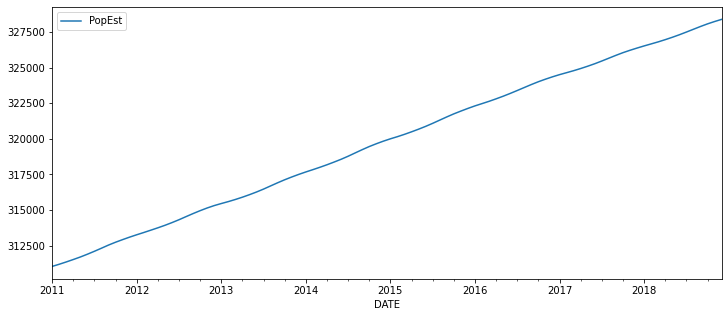

In [ ]:
df.plot(figsize=(12,5))

In [ ]:
len(df)

96

In [ ]:
train = df.iloc[:84]

In [ ]:
test = df.iloc[84:]

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
model = AR(train['PopEst'])

In [ ]:
AR1fit = model.fit(maxlag=1,)

In [ ]:
AR1fit.k_ar

1

In [ ]:
AR1fit.params

const        284.913797
L1.PopEst      0.999686
dtype: float64

In [ ]:
start = len(train)

In [ ]:
end = len(train) + len(test) - 1

In [ ]:
start

84

In [ ]:
end

95

In [ ]:
AR1fit.predict(start=start,end=end)

2018-01-01    326560.403377
2018-02-01    326742.749463
2018-03-01    326925.038278
2018-04-01    327107.269838
2018-05-01    327289.444162
2018-06-01    327471.561268
2018-07-01    327653.621173
2018-08-01    327835.623896
2018-09-01    328017.569455
2018-10-01    328199.457868
2018-11-01    328381.289152
2018-12-01    328563.063326
Freq: MS, dtype: float64

In [ ]:
test

,PopEst
DATE,
2018-01-01,326527
2018-02-01,326669
2018-03-01,326812
2018-04-01,326968
2018-05-01,327134
2018-06-01,327312
2018-07-01,327502
2018-08-01,327698
2018-09-01,327893


In [ ]:
pred1 = AR1fit.predict(start=start,end=end)

In [ ]:
pred1 = pred1.rename('AR(1)pred')

In [ ]:
pred1

2018-01-01    326560.403377
2018-02-01    326742.749463
2018-03-01    326925.038278
2018-04-01    327107.269838
2018-05-01    327289.444162
2018-06-01    327471.561268
2018-07-01    327653.621173
2018-08-01    327835.623896
2018-09-01    328017.569455
2018-10-01    328199.457868
2018-11-01    328381.289152
2018-12-01    328563.063326
Freq: MS, Name: AR(1)pred, dtype: float64

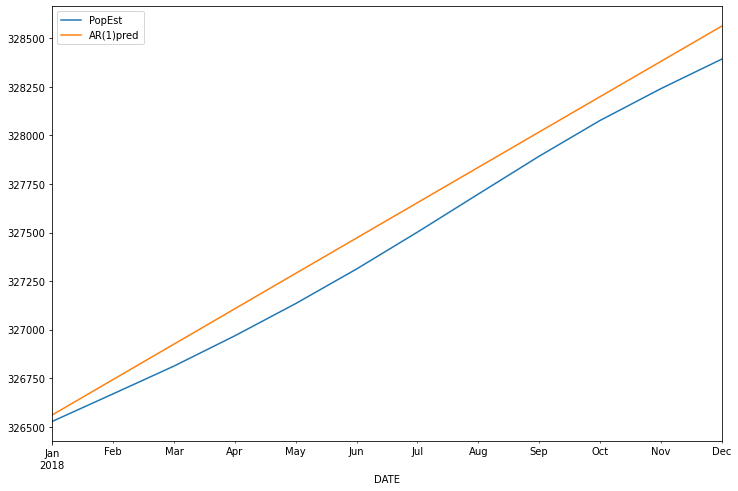

In [ ]:
test.plot(figsize=(12,8),legend=True)
pred1.plot(legend=True)

In [ ]:
AR2fit = model.fit(maxlag=2)

In [ ]:
AR2fit.params

const        137.368305
L1.PopEst      1.853490
L2.PopEst     -0.853836
dtype: float64

In [ ]:
pred2 = AR2fit.predict(start,end)

In [ ]:
pred2 = pred2.rename('AR(2)pred')

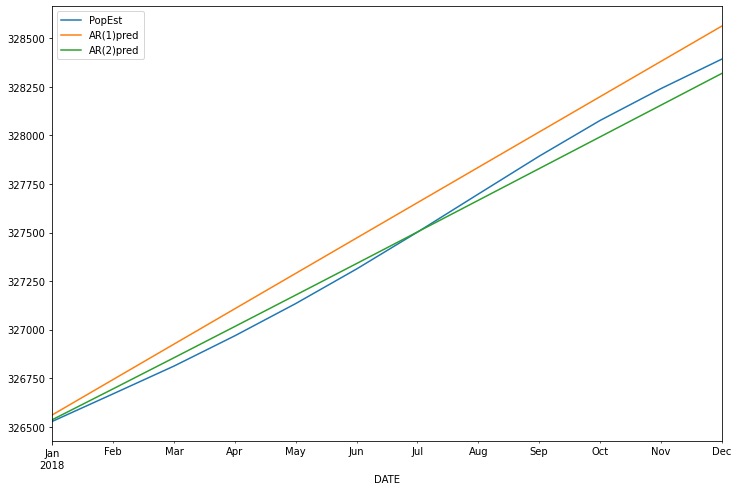

In [ ]:
test.plot(figsize=(12,8),legend=True)
pred1.plot(legend=True)
pred2.plot(legend=True)

In [ ]:
ARfit = model.fit(ic='t-stat')

In [ ]:
ARfit.params

const        82.309677
L1.PopEst     2.437997
L2.PopEst    -2.302100
L3.PopEst     1.565427
L4.PopEst    -1.431211
L5.PopEst     1.125022
L6.PopEst    -0.919494
L7.PopEst     0.963694
L8.PopEst    -0.439511
dtype: float64

In [ ]:
pred8 = ARfit.predict(start,end)
pred = pred8.rename('AR(8) pred')

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
labels = ['AR1','AR2','AR8']

In [ ]:
preds = [pred1,pred2,pred8]

In [ ]:
for i in range(3):
  error = mean_squared_error(test['PopEst'],preds[i])
  print(f'{labels[i]} MSE was : {error}')

AR1 MSE was : 17449.714242014332
AR2 MSE was : 2713.258895540958
AR8 MSE was : 186.97809636815634


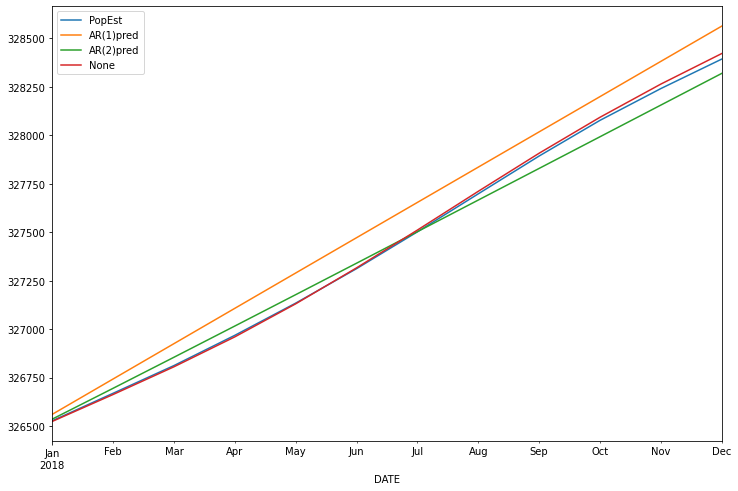

In [ ]:
test.plot(figsize=(12,8),legend=True)
pred1.plot(legend=True)
pred2.plot(legend=True)
pred8.plot(legend=True)

In [45]:
#forecasting -- future

model = AR(df['PopEst'])
ARfit = model.fit()

forcasted_values = ARfit.predict(start=len(df),end=len(df)+12).rename('Forecast')

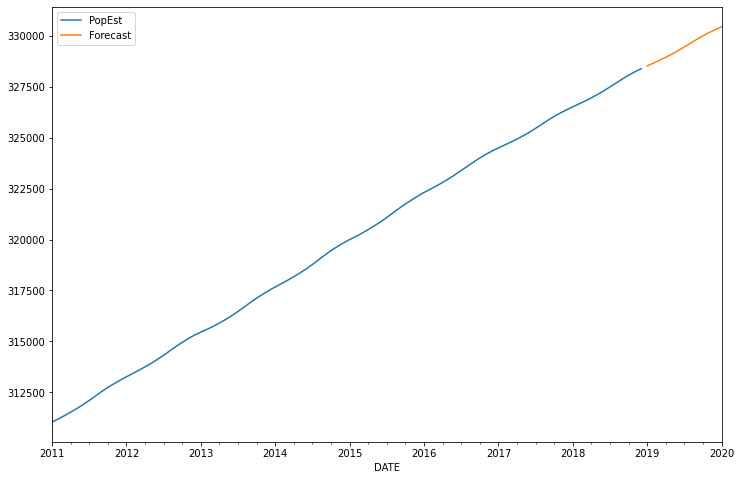

In [47]:
df['PopEst'].plot(figsize=(12,8),legend=True)
forcasted_values.plot(legend=True)